In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder # untuk ordinal dan binary encoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# metric
from sklearn.metrics import mean_squared_error 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


---
# **Description**

Bank Marketing Campaign
Context
The types of financial products used by the public are more varied. One financial product that is well-known to the public is term deposits. The term deposit mechanism is that a customer deposits a sum of money at a bank or a financial institution, and the money can only be withdrawn after a certain period of time. As compensation, customers will be given a fixed interest according to the nominal amount of money deposited.
<br>
Nevertheless, as business entities with financial products and respective customers, banks still have to compete to not lose customers. One of the ways to acquire new customers is by conducting a marketing campaign.
Features
<br>
Customer profile

1. age
2. job
3. balance
4. housing
5.loan
<br>

Marketing data

1. contact: Contact communication type.
2. month: Last contact month of the year.
3. campaign: Number of contacts performed during this campaign and for this client.
4. pdays: Number of days after the client was contacted from the previous campaign.
5. poutcome: Outcome of the previous marketing campaign.
6. deposit: Whether the customer deposits or not.

Time deposits have internal functions for banks, namely: 
- Meeting bank capital needs
- Maintaining bank liquidity. 

Time deposits are one of the main sources of bank capital that are easy to utilize. Banks need working capital that is always met because the bank's function is to channel money from the public in the form of credit. 

Time deposits also have an external function, namely facilitating the flow of money payments. 
Time deposits are banking products that allow customers to deposit money within a certain period of time. Customers cannot withdraw money before the specified period, for example 1 year, 5 years, or 10 years.

Sources : 
1. https://www.investopedia.com/terms/t/termdeposit.asp#:~:text=A%20term%20deposit%20is%20a%20type%20of%20deposit%20account%20held,month%20to%20a%20few%20years
2. https://siplawfirm.id/deposito-berjangka/?lang=id#:~:text=Fungsi%20internal%2C%20deposito%20dapat%20mendukung,tinggi%20guna%20membantu%20perekonomian%20nasional.&text=Keuntungan%20deposito%20berjangka%20adalah%20memiliki,Dapat%20dijadikan%20investasi
3. 


---
# **Bussiness Problem**


Business Problem: The bank needs to predict effectively and reach out to customers who are most likely to open a term deposit account via its campaign. 


This may include the characteristics of possible patterns that reflect positive responses for effective campaigns, thus optimizing marketing efforts, enhancing customer acquisition, and reducing campaign costs.

Business Objective are:

- Maximize Campaign Effectiveness by Identify and reach customers who likely to subscribe to a term deposit, tso that it will increasing the conversion rate of the campaign.
- Optimize Marketing Resources by Decrease the cost of the campaign by reducing outreach to customers unlikely to subscribe to the term deposit product; resources will be used more efficiently.
- Enhanced Customer Acquisition Insights provided by the model will ensure an improved strategy regarding targeting customers, hence yielding better customer acquisition rates for the term deposit product.
Increased ROI

Achieve greater profitability in the campaign by focusing efforts on those high-potential customers who reduce the cost per acquisition. The precise focus ensures that the bank does not spend resources on uninterested customers, while the F1-score strikes a balance between precision and recall for effectiveness to meet the desired reach. If customer retention or long-term engagement is vital, recall might also play an important role to ensure that the bank does not miss the subscribers.

In this classification problem the model should be able to predict whether a customer will open a term deposit-a binary outcome with "yes" or "no," categories.
1. Primary Metrics
    - Accuracy
        Good for balanced datasets, measures the percentage of correct predictions.
        However, in the case of imbalanced classes (for example, more "no"s than "yes"es), accuracy can be misleading. 
    - Recall (Sensitivity)
        Refers to the proportion of actual "yes" cases that were correctly predicted.
        Useful if losing potential customers (false negatives) will have a huge effect. 
    - F1-Score
        Balances precision and recall; useful when both false positives and false negatives are important.
    - Precision
        Focuses on the proportion of correctly predicted "yes" (positive) cases among all predicted positives.
        Important if the cost of targeting uninterested customers (false positives) is high.

Precision and F1-score might be more important in a marketing campaign context to avoid waste in marketing resources and to make as much effect with the campaign as possible. If customer retention is highly valued, recall could also be a focus.



---
# **The method**

The steps applied in this project will include but are not limited to these highlighted below.

1. Understanding the Data
    - Review data structure, features, and target variable.
    - Target: deposit (binary: "yes" or "no").
    - Features that will be included for this customer profile data - age, job, balance, housing, loan - and marketing campaign data - contact, month, campaign, pdays, poutcome.
2. EDA 
    - Missing Values Treatment: detect and decide on filling the NaNs with mean/median values or deleting rows containing them.
    - Visualize data in order to understand distributions and relationships among basic characteristics of the data. Observe class imbalance: number of "yes" versus "no" in deposit.
    - Check the correlation between features.
    - Identify outliers or unusual patterns.

3. Data Preparation
    - Categorical Variable Encoding: Perform label encoding for binary variables: housing, loan, deposit;.
    - Use one-hot encoding for multi-class categorical variables: job, contact, month, poutcome. 
    - Scaling Numeric Variables Standardize or normalize continuous features (age, balance, campaign, pdays) to put all variables on the same scale. 
    - Splitting the Data Divide the data into training and testing sets - typically, 70-80% go to training, and 20-30% are left for testing. 

4. Model Selection
    - Select a proper machine learning model. In binary classification, some most common models are :
    - Logistic Regression: Simple, interpretable.
    - Decision Tree: Non-linear relationship, easy to interpret.
    - Random Forest: Ensemble of Decision Trees, robust to overfitting.
    - Gradient Boosting (XGBoost, LightGBM): Performing well on unbalanced datasets.
    - Support Vector Machine: Performs well in high dimensionality spaces.

5. Model Training
    - Train the model on the training set.
    - Tune hyperparameters - for example, tree depth for Decision Trees, and learning rate for Gradient Boosting.

6. Model Evaluation 
    - Evaluate your model on the test set using performance metrics such as: Accuracy: Proportion of correct predictions. Precision: Number of the predicted positives that are actually positive. Recall: Number of actual positives correctly identified. F1-score: Harmonic mean of precision and recall. AUC-ROC: The measure of a model's ability to distinguish between classes.
    - Cross-validation will also be considered to validate the model across different subsets of data.

7. Model Tuning
    - The Hyperparameter tuning can be done via GridSearchCV or RandomizedSearchCV to arrive at the best combination of parameters associated with the model.
    - This may include parameter tuning such as the number of estimators in a Random Forest, the learning rate for XGBoost, among others.

8. Model Deployment
    - After training and evaluating the model, the model is put to work on unseen new data for prediction.
    - You can create a prediction pipeline to handle incoming customer data and output a prediction for whether they will subscribe to the term deposit.

9. Interpretability and Business Insights
    - Interpret the model's predictions (e.g., feature importance for tree-based models).
    - Provide actionable business insights on which factors influence the likelihood of subscribing to a term deposit.

In [13]:
df = pd.read_csv('D:/PURWADHIKA/Bank Marketing Campaign/data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [15]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [16]:
df.duplicated().sum()

8

In [10]:
df.isna().sum()/df.shape[0]*100

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
deposit     0.0
dtype: float64

In [11]:
display(df.describe(), df.describe(include='object'))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


In [12]:
pd.set_option('display.max_colwidth', 1)

listItem = []
for col in df.columns : listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


In [19]:
pd.DataFrame({
    'column': df.columns.values,
    'datatype': df.dtypes.values,
    'nullvalue(%)': df.isna().mean().values * 100,
    'negativevalue(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'uniquevalue': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,age,int64,0.0,0.000,0.000,0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,object,0.0,0.000,0.000,0,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,int64,0.0,6.137,6.906,0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,object,0.0,0.000,0.000,0,2,"[no, yes]"
4,loan,object,0.0,0.000,0.000,0,2,"[no, yes]"
5,contact,object,0.0,0.000,0.000,0,3,"[cellular, telephone, unknown]"
6,month,object,0.0,0.000,0.000,0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,int64,0.0,0.000,0.000,0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,int64,0.0,74.427,0.000,0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,object,0.0,0.000,0.000,0,4,"[unknown, other, failure, success]"


In [18]:
#drop duplicates
df = df.drop_duplicates()

In [20]:
unknown_percentage = (df['poutcome'].value_counts(normalize=True)['unknown']) * 100

print(f"Percentage of unknown in poutcome: {unknown_percentage:.2f}%")


Percentage of unknown in poutcome: 74.45%


unknown (in poutcome) and -1 (in pdays) together represent more than 74% of the dataset, it indicates that a large portion of the data is either missing or not relevant to the prior marketing campaign, which could affect the quality and performance of the machine learning model. This high proportion of missing or unknown values needs careful handling.

Here are a few strategies to address this:

1. Analyzing the Impact of unknown and -1
poutcome = 'unknown': As mentioned, this represents clients who have no prior campaign outcome or whose previous campaign outcome isn't recorded.
pdays = -1: This indicates that the client was not contacted in the previous campaign or doesn't have campaign history.
Both columns may carry valuable information regarding customer engagement, but they may also introduce noise if not handled properly.

In [43]:
# Count the matching rows where pdays = -1 and poutcome = 'unknown'
matching_rows = df[(df['pdays'] == -1) & (df['poutcome'] == 'unknown')]
matching_count = matching_rows.shape[0]

# Calculate percentage of matching rows
total_rows = df['poutcome'].shape[0]
percentage_matching = (matching_count / total_rows) * 100

# Display the results
print(f"Number of rows where pdays = -1 and poutcome = 'unknown': {matching_count}")
print(f"Percentage of matching rows: {percentage_matching:.2f}%\n")



Number of rows where pdays = -1 and poutcome = 'unknown': 5809
Percentage of matching rows: 74.43%



In [37]:
pdays_negative_one_count = df[df['pdays'] == -1].shape[0]

# Print the results
print(f"Number of rows where pdays = -1: {pdays_negative_one_count}")

Number of rows where pdays = -1: 5809


In [38]:
# Count the rows where poutcome = 'unknown'
poutcome_unknown_count = df[df['poutcome'] == 'unknown'].shape[0]

# Print the results
print(f"Number of rows where poutcome = 'unknown': {poutcome_unknown_count}")

Number of rows where poutcome = 'unknown': 5811


EDA

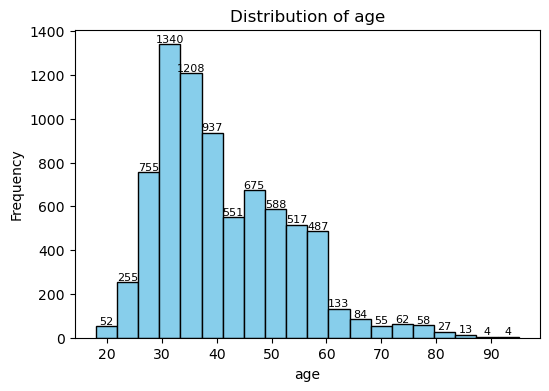

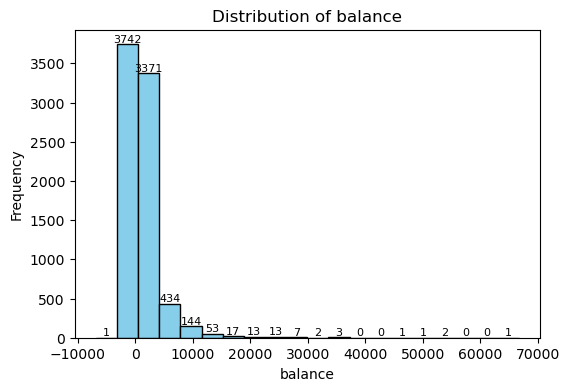

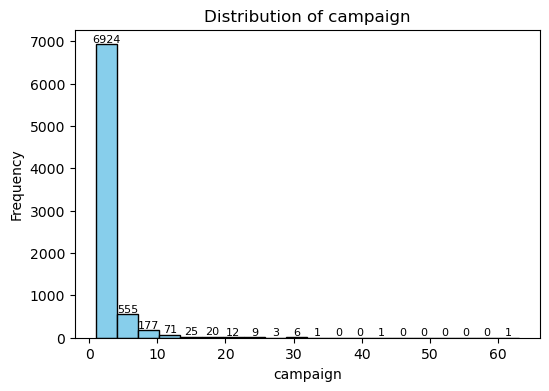

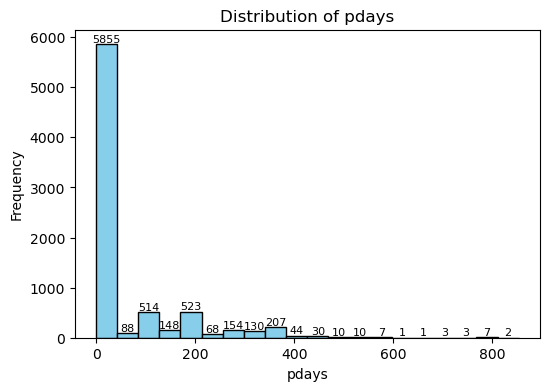

In [44]:
# List of numerical columns
numerical_features = ['age', 'balance', 'campaign', 'pdays']

# Plot histograms with frequency annotations
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    n, bins, patches = plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    
    # Add annotations for frequency values
    for i in range(len(patches)):
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i],   # Position of the text
                 str(int(n[i])),                              # Convert frequency to integer
                 ha='center', va='bottom', fontsize=8)        # Align and style
    
    # Plot settings
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


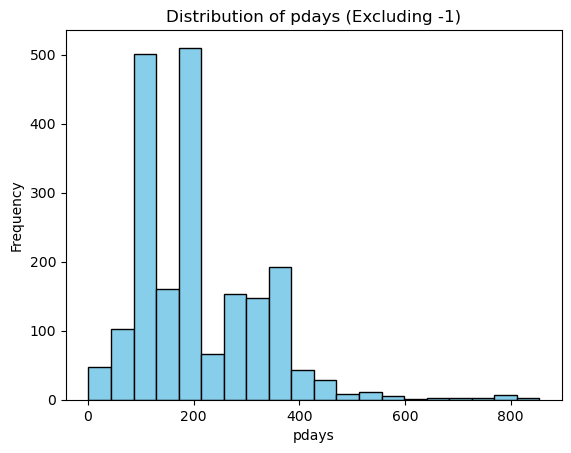

Number of rows with pdays = -1: 5809


In [45]:
pdays_negative_one = df[df['pdays'] == -1].shape[0]

# Filter out -1 for the histogram
pdays_positive = df[df['pdays'] != -1]['pdays']

# Plot histogram for non -1 values
plt.hist(pdays_positive, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of pdays (Excluding -1)')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()

# Print count of -1
print(f"Number of rows with pdays = -1: {pdays_negative_one}")

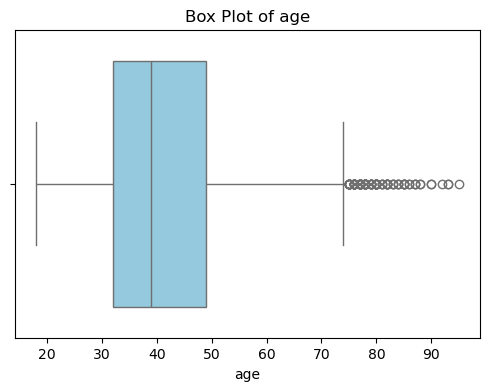

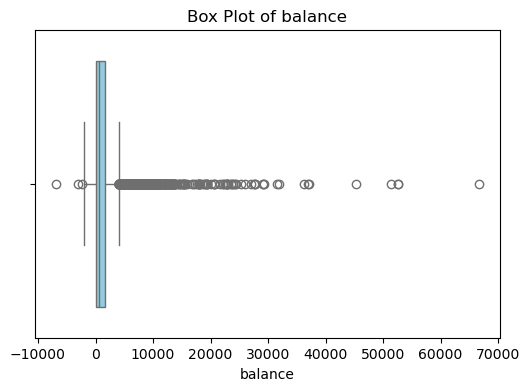

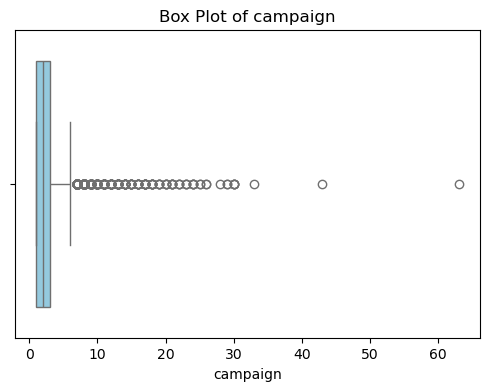

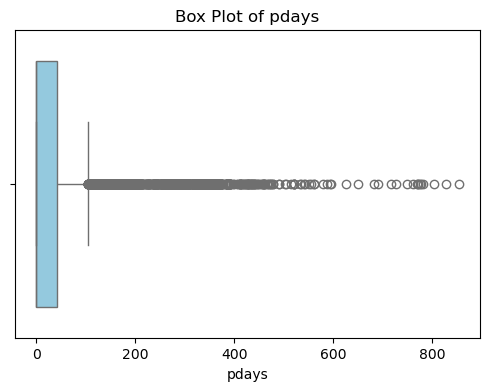

In [46]:

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


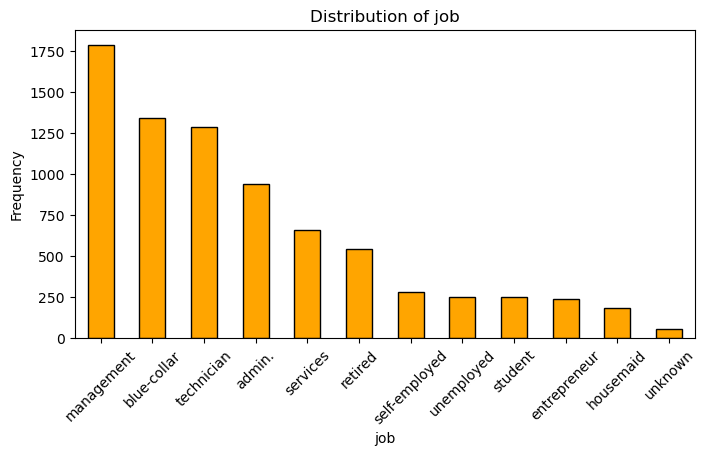

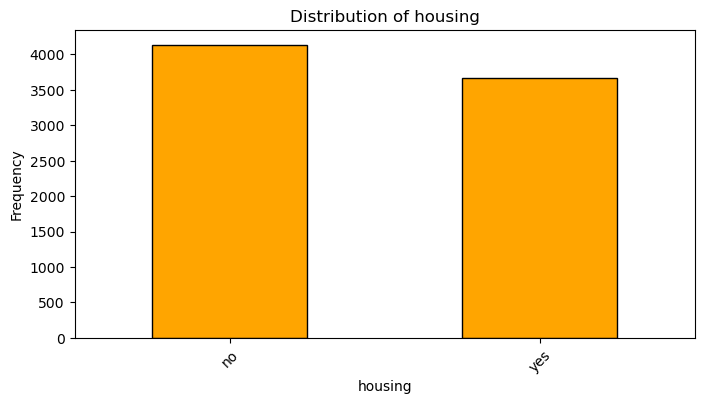

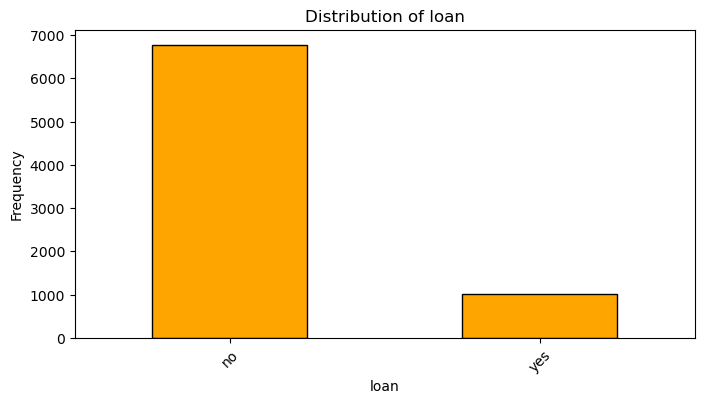

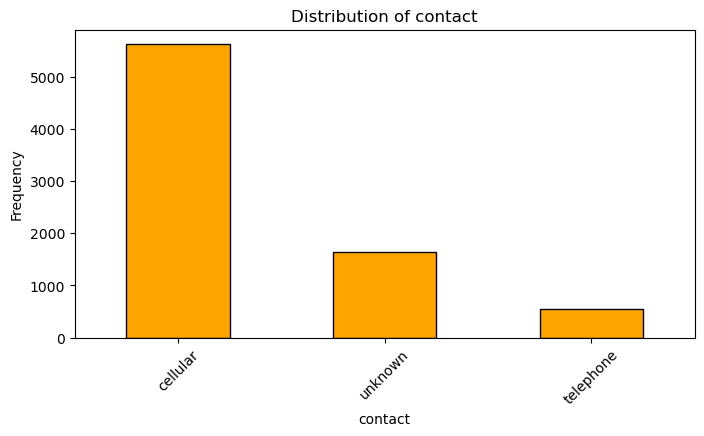

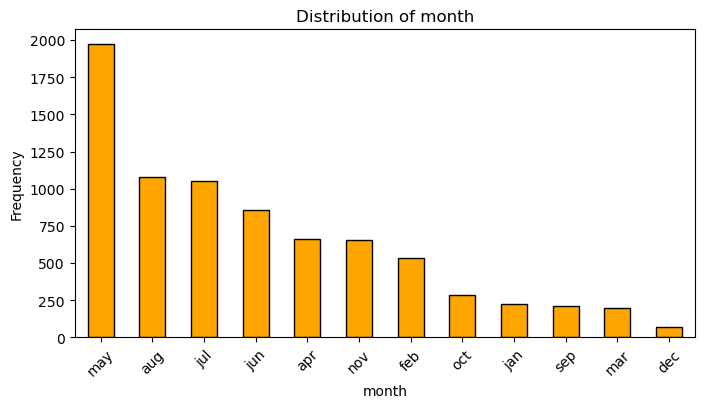

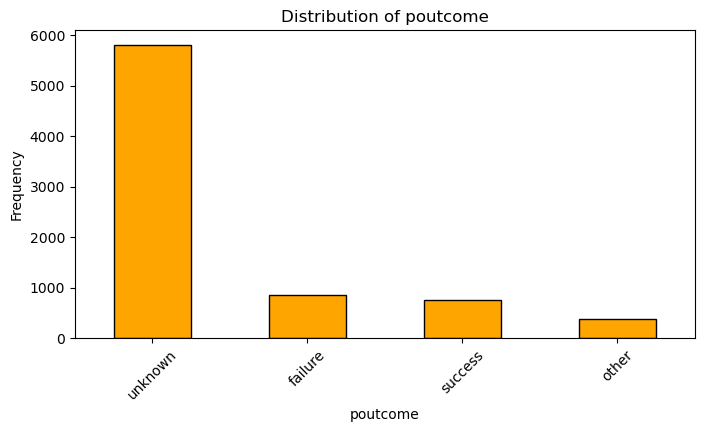

In [47]:
categorical_features = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plot bar plots
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    df[feature].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


In [24]:
# Print value counts for each categorical feature
for feature in categorical_features:
    print(f"\nValue counts for {feature}:\n")
    print(df[feature].value_counts())



Value counts for job:

job
management       1789
blue-collar      1343
technician       1289
admin.           936 
services         658 
retired          540 
self-employed    280 
unemployed       249 
student          247 
entrepreneur     236 
housemaid        184 
unknown          54  
Name: count, dtype: int64

Value counts for housing:

housing
no     4136
yes    3669
Name: count, dtype: int64

Value counts for loan:

loan
no     6781
yes    1024
Name: count, dtype: int64

Value counts for contact:

contact
cellular     5623
unknown      1636
telephone    546 
Name: count, dtype: int64

Value counts for month:

month
may    1973
aug    1081
jul    1049
jun    857 
apr    662 
nov    657 
feb    534 
oct    286 
jan    227 
sep    212 
mar    199 
dec    68  
Name: count, dtype: int64

Value counts for poutcome:

poutcome
unknown    5811
failure    848 
success    761 
other      385 
Name: count, dtype: int64


Scaling

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)